## Weighed Graph

In [2]:
# Each tuple (u,v,w) in list is representing the edge from u to v with weight w
edges = [(1, 2, 20), (2, 3, 30), (2, 4, 40), (4, 5, 50)]

## Adjacency Matrix

In [3]:
def get_vertices(edges):
  vertices = set()
  for u, v, w in edges:
    print(w)
    vertices.add(u)
    vertices.add(v)
  return vertices


vertices = get_vertices(edges)
get_vertices(edges)

20
30
40
50
20
30
40
50


{1, 2, 3, 4, 5}

In [4]:
# def create_adjacency_matrix(vertices, edges):
#   size = len(vertices)
#   adjacency_matrix = [[float('inf')] * size for _ in range(size)]

#   for u, v, w in edges:
#     adjacency_matrix[u][v] = w

#   return adjacency_matrix


# create_adjacency_matrix(vertices, edges)

In [5]:
def get_vertices(edges):
  vertices = set()
  for u, v, w in edges:
    vertices.add(u)
    vertices.add(v)
  return vertices


vertices = get_vertices(edges)
print(vertices)

{1, 2, 3, 4, 5}


## Adjacency Matrix

In [6]:
# def create_adjacency_matrix(vertices, edges):
#   size = len(vertices)
#   adjacency_matrix = [[(0, 0) for j in range(size)] for i in range(size)]

#   for u, v, w in edges:
#     adjacency_matrix[u][v] = (1, w)

#   return adjacency_matrix


# create_adjacency_matrix(vertices, edges)

In [7]:
# each tuple (u, v, w) represents an edge from u to v with weight w.
edges = [(0, 1, 10), (0, 2, 80), (1, 2, 6), (1, 4, 20),
         (2, 3, 70), (4, 5, 50), (4, 6, 4), (5, 6, 10)]  # E

In [8]:
def get_vertices(edges):
  vertices = set()
  for u, v, w in edges:
    vertices.add(u)
    vertices.add(v)
  return vertices


vertices = get_vertices(edges)
vertices

{0, 1, 2, 3, 4, 5, 6}

In [9]:
def create_adjacency_list(vertices, edges):
  adjacency_list = {}

  for u in vertices:
    adjacency_list[u] = []

  for u, v, w in edges:
    adjacency_list[u].append((v, w))

  return adjacency_list


create_adjacency_list(vertices, edges)

{0: [(1, 10), (2, 80)],
 1: [(2, 6), (4, 20)],
 2: [(3, 70)],
 3: [],
 4: [(5, 50), (6, 4)],
 5: [(6, 10)],
 6: []}

## Dijkstra's Algorithm

In [10]:
def dijkstra(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  # Iterate until all vertices are processed
  while True:
    # Find current_vertex with the smallest known distance
    current_vertex = None
    for vertex in adjacency_list:
      if not visited[vertex]:
        if current_vertex is None:
          current_vertex = vertex
        if distance[vertex] < distance[current_vertex]:
          current_vertex = vertex

    # Break if no current_vertex is found
    if current_vertex is None:
      break
    visited[current_vertex] = True

    # Update distances to its neighbors
    for neighbor, weight in adjacency_list[current_vertex]:
      if not visited[neighbor]:
        # offering a new distance to neighbor
        new_distance = distance[current_vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance

    print(current_vertex)
  return distance


adjacency_list = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 3), ('D', 2), ('E', 3)],
    'C': [('B', 1), ('D', 4), ('E', 5)],
    'D': [],
    'E': [('D', 1)],
}

dijkstra(adjacency_list, 'A')

A
C
B
D
E


{'A': 0, 'B': 3, 'C': 2, 'D': 5, 'E': 6}

In [11]:
goal = None

numbers = [12, 13, 11, 34]

for num in numbers:
  if goal is None:
    goal = num
  if num < goal:
    goal = num
print(goal)

11


# Dijkstra's Algorithm (2)
## Priority Queue

In [12]:
import heapq
heap = []

heapq.heappush(heap, (80, 'rahul'))  # (priority,items)
heapq.heappush(heap, (60, 'vidhatri'))  # (priority,items)
heapq.heappush(heap, (70, 'cmd'))  # (priority,items)

heapq.heappop(heap)

(60, 'vidhatri')

In [13]:
class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, priority, item):  # dijkstra's (vertex, distance)
    heapq.heappush(self.heap, (priority, item))

  def dequeue(self):
    return heapq.heappop(self.heap)[1]


pq = PriorityQueue()
pq.enqueue(4, 'B')
pq.enqueue(5, 'v')
print(pq.dequeue())
print(pq.dequeue())

B
v


In [14]:
def dijkstra(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  pq = PriorityQueue()
  pq.enqueue(0, start_vertex)

  while not pq.is_empty():
    current_vertex = pq.dequeue()
    if visited[current_vertex]:
      print(f'skip {current_vertex=}')
      continue

    print(f'{current_vertex=}, {pq.heap}')
    visited[current_vertex] = True

    # update distances to its neighbors
    for neighbor, weight in adjacency_list[current_vertex]:
      if not visited[neighbor]:
        new_distance = distance[current_vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance
          pq.enqueue(new_distance, neighbor)
    print(f'after: {pq.heap}')
  return distance


adjacency_list = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 3), ('D', 2), ('E', 3)],
    'C': [('B', 1), ('D', 4), ('E', 5)],
    'D': [],
    'E': [('D', 1)],
}

dijkstra(adjacency_list, 'A')

current_vertex='A', []
after: [(2, 'C'), (4, 'B')]
current_vertex='C', [(4, 'B')]
after: [(3, 'B'), (4, 'B'), (6, 'D'), (7, 'E')]
current_vertex='B', [(4, 'B'), (7, 'E'), (6, 'D')]
after: [(4, 'B'), (5, 'D'), (6, 'D'), (7, 'E'), (6, 'E')]
skip current_vertex='B'
current_vertex='D', [(6, 'D'), (6, 'E'), (7, 'E')]
after: [(6, 'D'), (6, 'E'), (7, 'E')]
skip current_vertex='D'
current_vertex='E', [(7, 'E')]
after: [(7, 'E')]
skip current_vertex='E'


{'A': 0, 'B': 3, 'C': 2, 'D': 5, 'E': 6}

# Bellman-Ford Algorithm

In [15]:
def bellman_ford(adjacency_list, start_vertex):
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  # |v|-1 times loop (relaxation process)
  for _ in range(len(adjacency_list) - 1):
    for parent in adjacency_list:
      if distance[parent] != float('inf'):
        for child, weight in adjacency_list[parent]:
          new_distance = distance[parent] + weight
          if new_distance < distance[child]:
            distance[child] = new_distance

  return distance


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

bellman_ford(adjacency_list, 0) == {0: 0, 1: 10, 2: 16, 3: 86, 4: 30, 5: 80, 6: 35}

True

In [16]:
adjacency_list = {
    'S': [('E', 8), ('A', 10)],
    'E': [('D', 1)],
    'A': [('C', 2)],
    'D': [('A', -4), ('C', -1)],
    'B': [('A', 1)],
    'C': [('B', -2)],
}

bellman_ford(adjacency_list, 'S') == {'S': 0, 'E': 8, 'A': 5, 'D': 9, 'B': 5, 'C': 7}

True

# Dijkstra's algo

In [17]:
import heapq


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, priority, item):
    heapq.heappush(self.heap, (priority, item))

  def dequeue(self):
    return heapq.heappop(self.heap)[1]

  def __str__(self):
    return str(self.heap)


pq = PriorityQueue()
pq.enqueue(4, 'B')
pq.enqueue(2, 'C')
print(pq.dequeue())

# pq.enqueue(80, "rahul")
# pq.enqueue(50, "vidhatri")
# pq.enqueue(100, "cmd")
# print(pq.dequeue())
# print(pq.dequeue())
# print(pq.dequeue())

C


In [18]:
import heapq


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, priority, item):
    heapq.heappush(self.heap, (priority, item))

  def dequeue(self):
    return heapq.heappop(self.heap)[1]

  def __str__(self):
    return str(self.heap)


def dijkstra(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  pq = PriorityQueue()
  pq.enqueue(0, start_vertex)

  while not pq.is_empty():
    current_vertex = pq.dequeue()
    visited[current_vertex] = True

    for neighbor, weight in adjacency_list[current_vertex]:
      if not visited[neighbor]:
        new_distance = distance[current_vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance
          pq.enqueue(new_distance, neighbor)

  return distance


adjacency_list = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 3), ('D', 2), ('E', 3)],
    'C': [('B', 1), ('D', 4), ('E', 5)],
    'D': [],
    'E': [('D', 1)],
}

dijkstra(adjacency_list, 'A') == {'A': 0, 'B': 3, 'C': 2, 'D': 5, 'E': 6}

True

In [19]:
adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

dijkstra(adjacency_list, 0) == {0: 0, 1: 10.0, 2: 16.0, 3: 86.0, 4: 30.0, 5: 80.0, 6: 35.0}

True

# Floyd Warshall

In [20]:
def floyd(adjacency_list):

  # initialize distances matrix with infinities
  dist = {u: {u: float('inf') for u in adjacency_list} for u in adjacency_list}

  # set distance to self as 0
  for u in adjacency_list:
    dist[u][u] = 0

  # initialize distances based on adjacency list
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      dist[u][v] = weight

  # triple nested loop to update distances
  for k in adjacency_list:
    for i in adjacency_list:
      for j in adjacency_list:
        # core logic
        if dist[i][j] > dist[i][k] + dist[k][j]:
          dist[i][j] = dist[i][k] + dist[k][j]

  return dist


adjacency_list = {
    1: [(3, -2)],
    2: [(1, 4), (3, 3)],
    3: [(4, 2)],
    4: [(2, -1)],
}
expected = {1: {1: 0, 2: -1, 3: -2, 4: 0},
            2: {1: 4, 2: 0, 3: 2, 4: 4},
            3: {1: 5, 2: 1, 3: 0, 4: 2},
            4: {1: 3, 2: -1, 3: 1, 4: 0}}

dist = floyd(adjacency_list)
dist == expected

[[dist[u][v] for v in adjacency_list] for u in adjacency_list]

True

[[0, -1, -2, 0], [4, 0, 2, 4], [5, 1, 0, 2], [3, -1, 1, 0]]

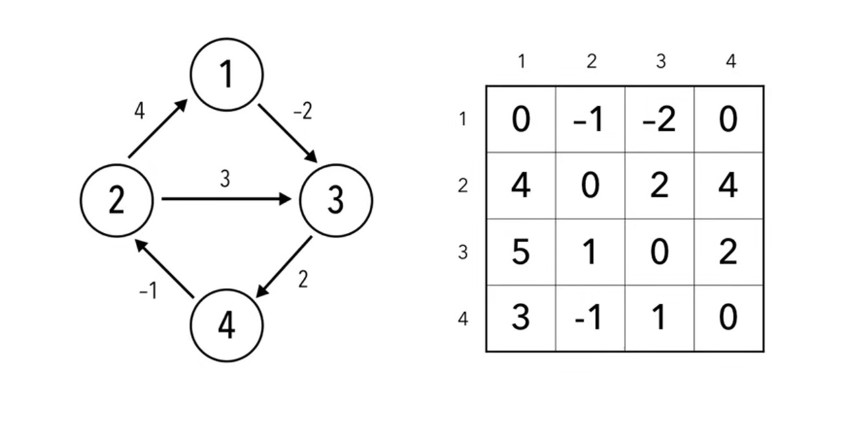

In [21]:
adjacency_list = {
    1: [(3, -2)],
    2: [(1, 4), (3, 3)],
    3: [(4, 2)],
    4: [(2, -1)],
}

vertices = list(adjacency_list)

# initialize distances matrix with infinities
dist = {u: {u: float('inf') for u in vertices} for u in vertices}

# initialize distances based on adjacency list
for u in vertices:
  for v, weight in adjacency_list[u]:
    dist[u][v] = weight

# set distance to self as 0
for u in vertices:
  dist[u][u] = 0

dist

{1: {1: 0, 2: inf, 3: -2, 4: inf},
 2: {1: 4, 2: 0, 3: 3, 4: inf},
 3: {1: inf, 2: inf, 3: 0, 4: 2},
 4: {1: inf, 2: -1, 3: inf, 4: 0}}

# dijkstra revise
## 2nd approach

In [22]:
class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, priority, item):
    heapq.heappush(self.heap, (priority, item))

  def dequeue(self):
    return heapq.heappop(self.heap)[1]

  def __str__(self):
    return str(self.heap)

In [23]:
def dijkstra(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  pq = PriorityQueue()
  pq.enqueue(0, start_vertex)

  # process the queue until it's empty
  while not pq.is_empty():
    current_vertex = pq.dequeue()
    visited[current_vertex] = True

    # update distances to neighbors
    for neighbor, weight in adjacency_list[current_vertex]:
      # print(neighbor, weight)
      if not visited[neighbor]:
        new_distance = distance[current_vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance
          pq.enqueue(new_distance, neighbor)

  return distance


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}
dijkstra(adjacency_list, 0)

{0: 0, 1: 10, 2: 16, 4: 30, 3: 86, 5: 80, 6: 35}

In [24]:
def dijkstra(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  pq = PriorityQueue()
  pq.enqueue(0, start_vertex)

  # process the queue until it's empty
  while not pq.is_empty():
    current_vertex = pq.dequeue()
    visited[current_vertex] = True

  # update distances to neighbors
  for neighbor, weight in adjacency_list[current_vertex]:
    if not visited[neighbor]:
      new_distance = distance[current_vertex] + weight
      if new_distance < distance[neighbor]:
        distance[neighbor] = new_distance
        pq.enqueue(new_distance, neighbor)

  return distance


adjacency_list = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 3), ('D', 2), ('E', 3)],
    'C': [('B', 1), ('D', 4), ('E', 5)],
    'D': [],
    'E': [('D', 1)],
}

dijkstra(adjacency_list, 'A')

{'A': 0, 'B': 4, 'C': 2, 'D': inf, 'E': inf}

## 1st approach

In [25]:
def dijkstra(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  # loop until all vertices have been processed
  while True:
    current_vertex = None
    for vertex in adjacency_list:
      if not visited[vertex]:
        if current_vertex is None or distance[vertex] < distance[current_vertex]:
          current_vertex = vertex

    if current_vertex is None:
      break  # no more vertices to process (all visited)

    visited[current_vertex] = True

    for neighbor, weight in adjacency_list[current_vertex]:
      if not visited[neighbor]:
        new_distance = distance[current_vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance

  return distance


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}
dijkstra(adjacency_list, 0) == {0: 0, 1: 10.0, 2: 16.0, 3: 86.0, 4: 30.0, 5: 80.0, 6: 35.0}

True

# Bellman-ford revise

In [26]:
def bellman_ford(adjacency_list, start_vertex):
  # initialize distances
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  # relax for all edges |v|-1 times
  for _ in range(len(adjacency_list)-1):
    for vertex in adjacency_list:
      for neighbor, weight in adjacency_list[vertex]:
        if distance[vertex] != float('inf'):
          new_distance = distance[vertex] + weight
          if new_distance < distance[neighbor]:
            distance[neighbor] = new_distance

  return distance


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

bellman_ford(adjacency_list, 0) == {0: 0, 1: 10, 2: 16, 3: 86, 4: 30, 5: 80, 6: 35}

True

# Floyd-Warshall revise

In [27]:
def floyd_warshall(adjacency_list):
  vertices = list(adjacency_list)

  # initialize distances matrix with infinities
  dist = {u: {v: float('inf')for v in vertices}for u in vertices}

  # initialize distances based on adjacency_list
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      dist[u][v] = weight

  # set distance to self as 0
  for v in vertices:
    dist[v][v] = 0

    # triple nested loop to update distances
    for k in vertices:
      for i in vertices:
        for j in vertices:
          if dist[i][k] != float('inf') and dist[k][j] != float('inf'):
            dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

  return dist


adjacency_list = {0: [(1, 10), (7, 8)],
                  1: [(5, 2)],
                  2: [(1, 1), (3, 1)],
                  3: [(4, 3)],
                  4: [(5, -1)],
                  5: [(2, -2)],
                  6: [(1, -4), (5, -1)],
                  7: [(6, 1)]}

dist = floyd_warshall(adjacency_list)
display(dist)

[list(dist[u].values()) for u in adjacency_list]

{0: {0: 0, 1: 5, 2: 5, 3: 6, 4: 9, 5: 7, 6: 9, 7: 8},
 1: {0: inf, 1: 0, 2: 0, 3: 1, 4: 4, 5: 2, 6: inf, 7: inf},
 2: {0: inf, 1: 1, 2: 0, 3: 1, 4: 4, 5: 3, 6: inf, 7: inf},
 3: {0: inf, 1: 1, 2: 0, 3: 0, 4: 3, 5: 2, 6: inf, 7: inf},
 4: {0: inf, 1: -2, 2: -3, 3: -2, 4: 0, 5: -1, 6: inf, 7: inf},
 5: {0: inf, 1: -1, 2: -2, 3: -1, 4: 2, 5: 0, 6: inf, 7: inf},
 6: {0: inf, 1: -4, 2: -4, 3: -3, 4: 0, 5: -2, 6: 0, 7: inf},
 7: {0: inf, 1: -3, 2: -3, 3: -2, 4: 1, 5: -1, 6: 1, 7: 0}}

[[0, 5, 5, 6, 9, 7, 9, 8],
 [inf, 0, 0, 1, 4, 2, inf, inf],
 [inf, 1, 0, 1, 4, 3, inf, inf],
 [inf, 1, 0, 0, 3, 2, inf, inf],
 [inf, -2, -3, -2, 0, -1, inf, inf],
 [inf, -1, -2, -1, 2, 0, inf, inf],
 [inf, -4, -4, -3, 0, -2, 0, inf],
 [inf, -3, -3, -2, 1, -1, 1, 0]]

# Minimum spanning tree algos

## Prim's algorithm

In [28]:
import heapq


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, priority, item):
    heapq.heappush(self.heap, (priority, item))

  def dequeue(self):
    return heapq.heappop(self.heap)

  def __str__(self):
    return str(self.heap)


pq = PriorityQueue()
pq.enqueue(5, ('A', 'B'))
pq.enqueue(4, ('B', 'C'))
print(pq.dequeue())
print(pq.dequeue())

(4, ('B', 'C'))
(5, ('A', 'B'))


In [29]:
def prim(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  visited[start_vertex] = True
  mst = []
  pq = PriorityQueue()

  # add all edges from start_vertex to the priority queue
  for neighbor, weight in adjacency_list[start_vertex]:
    pq.enqueue(weight, (start_vertex, neighbor))

  while not pq.is_empty():
    weight, (u, v) = pq.dequeue()

    # if the edge connects to an unvisited node, add this edge to the mst
    if not visited[v]:
      mst.append((u, v, weight))
      visited[v] = True

      # and enqueue neighboring edges (of v)
      for next_neighbor, next_weight in adjacency_list[v]:
        pq.enqueue(next_weight, (v, next_neighbor))

  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

prim(adjacency_list, 0)

[(0, 2, 6), (2, 1, 4), (2, 3, 11)]

In [30]:
adjacency_list = {
    'A': [('C', 3), ('D', 3), ('B', 2)],
    'B': [('A', 2), ('C', 4), ('E', 3)],
    'C': [('A', 3), ('B', 4), ('F', 6), ('E', 1)],
    'D': [('A', 3), ('F', 7)],
    'E': [('B', 3), ('C', 1), ('F', 8)],
    'F': [('D', 7), ('E', 8), ('G', 9), ('C', 6)],
    'G': [('F', 9)]
}

prim(adjacency_list, 'A') == [('A', 'B', 2),
                              ('A', 'C', 3),
                              ('C', 'E', 1),
                              ('A', 'D', 3),
                              ('C', 'F', 6),
                              ('F', 'G', 9)]

True

## Kruskal's Algorithm

In [31]:
def kruskal(adjacency_list):
  edges = []
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      edges.append((weight, u, v))

  # sort edges by weight
  edges.sort()

  # initialize the parent dictionary, mst
  parent = {vertex: vertex for vertex in adjacency_list}
  mst = []

  def find(node):
    while parent[node] != node:
      node = parent[node]
    return node

  # looping over all the edges
  for weight, u, v in edges:
    # try joining u -> v
    root1 = find(u)
    root2 = find(v)
    if root1 != root2:
      parent[root2] = root1
      mst.append((u, v, weight))

  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

kruskal(adjacency_list) == [(1, 2, 4), (0, 2, 6), (2, 3, 11)]

True

In [32]:
adjacency_list = {
    'A': [('C', 3), ('D', 3), ('B', 2)],
    'B': [('A', 2), ('C', 4), ('E', 3)],
    'C': [('A', 3), ('B', 4), ('F', 6), ('E', 1)],
    'D': [('A', 3), ('F', 7)],
    'E': [('B', 3), ('C', 1), ('F', 8)],
    'F': [('D', 7), ('E', 8), ('G', 9), ('C', 6)],
    'G': [('F', 9)]
}

kruskal(adjacency_list) == [('C', 'E', 1),
                            ('A', 'B', 2),
                            ('A', 'C', 3),
                            ('A', 'D', 3),
                            ('C', 'F', 6),
                            ('F', 'G', 9)]

True

# MCST revise

In [33]:
def prim(adjacency_list, start_vertex):
  mst = []
  pq = PriorityQueue()
  visited = {vertex: False for vertex in adjacency_list}
  visited[start_vertex] = True

  # add all edges from start_vertex to the priority queue
  for neighbor, weight in adjacency_list[start_vertex]:
    pq.enqueue(weight, (start_vertex, neighbor))

  while not pq.is_empty():
    weight, (u, v) = pq.dequeue()

  # if the edge connects to an unvisited node, add this edge to the mst
  if not visited[v]:
    mst.append((u, v, weight))
    visited[v] = True

    # enqueue edges of v that connect to unvisited nodes
    for next_neighbor, next_vertex in adjacency_list[v]:
      if not visited[next_neighbor]:
        pq.enqueue(next_vertex, (v, weight))

  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

prim(adjacency_list, 0)
prim(adjacency_list, 1)
prim(adjacency_list, 2)
prim(adjacency_list, 3)

[(0, 1, 10)]

[(1, 3, 15)]

[(2, 3, 11)]

[(3, 1, 15)]

In [34]:
# wrong ans👎

def kruskal(adjacency_list):
  mst = []

  edges = []
  for vertex in adjacency_list:
    for neighbor, weight in adjacency_list[vertex]:
      edges.append((weight, vertex, neighbor))
  edges.sort()

  parent = {vertex: vertex for vertex in adjacency_list}

  def find(node):
    while parent[node] != node:
      node = parent[node]
    return node

  for weight, u, v in edges:
    root1 = find(u)
    root2 = find(v)
  if root1 != root2:
    parent[root2] = root1
    mst.append((u, v, weight))

  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}
kruskal(adjacency_list)

[(3, 1, 15)]

In [35]:
def kruskal(adjacency_list):
  mst = []

  edges = []
  for vertex in adjacency_list:
    for neighbor, weight in adjacency_list[vertex]:
      edges.append((weight, vertex, neighbor))
  edges.sort()

  parent = {vertex: vertex for vertex in adjacency_list}

  def find(node):
    while parent[node] != node:
      node = parent[node]
    return node

  for weight, u, v in edges:
    root1 = find(u)
    root2 = find(v)
    if root1 != root2:
      parent[root2] = root1
      mst.append((u, v, weight))

  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

kruskal(adjacency_list) == [(1, 2, 4), (0, 2, 6), (2, 3, 11)]

True

# July 18

In [36]:
import heapq


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, priority, items):
    heapq.heappush(self.heap, (priority, items))

  def dequeue(self):
    return heapq.heappop(self.heap)[1]


pq = PriorityQueue()
pq.enqueue(4, 'B')
pq.enqueue(2, 'C')
print(pq.dequeue())
print(pq.dequeue())

C
B


In [37]:
def dijkstra(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}

  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  pq = PriorityQueue()
  pq.enqueue(0, start_vertex)

  while not pq.is_empty():
    current_vertex = pq.dequeue()
    visited[current_vertex] = True

    for neighbor, weight in adjacency_list[current_vertex]:
      if not visited[neighbor]:
        new_distance = distance[current_vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance
          pq.enqueue(new_distance, neighbor)

  return distance


adjacency_list = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 3), ('D', 2), ('E', 3)],
    'C': [('B', 1), ('D', 4), ('E', 5)],
    'D': [],
    'E': [('D', 1)],
}

dijkstra(adjacency_list, 'A') == {'A': 0, 'B': 3, 'C': 2, 'D': 5, 'E': 6}

True

In [38]:
def bellman_ford(adjacency_list, start_vertex):
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  for _ in range(len(adjacency_list) - 1):
    for vertex in adjacency_list:
      for neighbor, weight in adjacency_list[vertex]:
        new_distance = distance[vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance
  return distance


adjacency_list = {
    'S': [('E', 8), ('A', 10)],
    'E': [('D', 1)],
    'A': [('C', 2)],
    'D': [('A', -4), ('C', -1)],
    'B': [('A', 1)],
    'C': [('B', -2)],
}

bellman_ford(adjacency_list, 'S') == {'S': 0, 'E': 8, 'A': 5, 'D': 9, 'B': 5, 'C': 7}

True

In [39]:
def floyd(adjacency_list):
  dist = {u: {v: float('inf') for v in adjacency_list}for u in adjacency_list}

  for vertex in adjacency_list:
    dist[vertex][vertex] = 0

  for vertex in adjacency_list:
    for neighbor, weight in adjacency_list[vertex]:
      dist[vertex][neighbor] = weight

  for k in adjacency_list:
    for i in adjacency_list:
      for j in adjacency_list:
        if dist[i][j] > dist[i][k] + dist[k][j]:
          dist[i][j] = dist[i][k] + dist[k][j]

  return dist


adjacency_list = {
    1: [(3, -2)],
    2: [(1, 4), (3, 3)],
    3: [(4, 2)],
    4: [(2, -1)],
}

floyd(adjacency_list) == {1: {1: 0, 2: -1, 3: -2, 4: 0},
                          2: {1: 4, 2: 0, 3: 2, 4: 4},
                          3: {1: 5, 2: 1, 3: 0, 4: 2},
                          4: {1: 3, 2: -1, 3: 1, 4: 0}}

True

In [40]:
import heapq


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, priority, item):
    heapq.heappush(self.heap, (priority, item))

  def dequeue(self):
    return heapq.heappop(self.heap)

  pq = PriorityQueue()
  pq.enqueue(5, ('A', 'B'))
  pq.enqueue(2, ('B', 'H'))
  print(pq.dequeue())
  print(pq.dequeue())

('B', 'H')
('A', 'B')


In [41]:
def prim(adjacency_list, start_vertex):
  mst = []
  pq = PriorityQueue()
  visited = {vertex: False for vertex in adjacency_list}
  visited[start_vertex] = True

  for neighbor, weight in adjacency_list[start_vertex]:
    pq.enqueue(weight, (start_vertex, neighbor))

  while not pq.is_empty():
    weight, (u, v) = pq.dequeue()

    if not visited[v]:
      mst.append((u, v, weight))
      visited[v] = True
      for next_neighbor, next_weight in adjacency_list[v]:
        if not visited[next_neighbor]:
          pq.enqueue(next_weight, (v, next_neighbor))

  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

prim(adjacency_list, 0) == [(0, 2, 6), (2, 1, 4), (2, 3, 11)]

True

In [42]:
def kruskal(adjacency_list):
  mst = []

  edges = []
  for vertex in adjacency_list:
    for neighbor, weight in adjacency_list[vertex]:
      edges.append((weight, vertex, neighbor))
  edges.sort()

  parent = {vertex: vertex for vertex in adjacency_list}

  def find(node):
    while parent[node] != node:
      node = parent[node]
    return node

  for weight, u, v in edges:
    root1 = find(u)
    root2 = find(v)
    if root1 != root2:
      parent[root2] = root1
      mst.append((u, v, weight))
  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

kruskal(adjacency_list) == [(1, 2, 4), (0, 2, 6), (2, 3, 11)]

True

## GRPAs try

In [43]:
def create_directed_adjacency_list(edges):
  vertices = set()
  for u, v, w in edges:
    vertices.add(u)
    vertices.add(v)

  adjacency_list = {}
  for v in vertices:
    adjacency_list[v] = []
  for u, v, w in edges:
    adjacency_list[u].append((v, w))
  return adjacency_list


def create_undirected_adjacency_list(edges):
  vertices = set()
  for u, v, w in edges:
    vertices.add(u)
    vertices.add(v)

  adjacency_list = {}
  for v in vertices:
    adjacency_list[v] = []
  for u, v, w in edges:
    adjacency_list[u].append((v, w))
    adjacency_list[v].append((u, w))
  return adjacency_list


create_directed_adjacency_list([('A', 'B', 10), ('B', 'H', 20)])
create_undirected_adjacency_list([('A', 'B', 10), ('B', 'H', 20)])

{'A': [('B', 10)], 'B': [('H', 20)], 'H': []}

{'A': [('B', 10)], 'B': [('A', 10), ('H', 20)], 'H': [('B', 20)]}

In [51]:
# grpa 1 wrong👎 ans

def kruskal(adjacency_list):
  mst = []

  edges = []
  for vertex in adjacency_list:
    for neighbor, weight in adjacency_list[vertex]:
      edges.append((weight, vertex, neighbor))
  edges.sort()

  parent = {vertex: vertex for vertex in adjacency_list}

  def find(node):
    while parent[node] != node:
      node = parent[node]
    return node

  for weight, u, v in edges:
    root1 = find(u)
    root2 = find(v)
    if root1 != root2:
      parent[root2] = root1
      mst.append((u, v, weight))

  return mst


def fiber_link(adjacency_list):
  mst = kruskal(adjacency_list)
  display(mst)
  fiber_length = 0
  for u, v, weight in mst:
    fiber_length += weight
  return fiber_length


edges = [(0, 1, 10), (0, 2, 50), (0, 3, 300), (5, 6, 45), (2, 1, 30),
         (6, 4, 37), (1, 6, 65), (2, 5, 76), (1, 3, 40), (3, 4, 60), (2, 4, 20)]
fiber_link(create_undirected_adjacency_list(edges))  # == 182

[(0, 1, 10), (2, 4, 20), (1, 2, 30), (4, 6, 37), (1, 3, 40), (5, 6, 45)]

182

In [53]:
import heapq


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, priority, item):
    heapq.heappush(self.heap, (priority, item))

  def dequeue(self):
    return heapq.heappop(self.heap)[1]


pq = PriorityQueue()
pq.enqueue(2, 'A')
pq.enqueue(3, 'B')
print(pq.dequeue())
print(pq.dequeue())

A
B


In [46]:
# grpa 2

def dijkstra(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  predecessor = {vertex: None for vertex in adjacency_list}
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  pq = PriorityQueue()
  pq.enqueue(0, start_vertex)

  while not pq.is_empty():
    current_vertex = pq.dequeue()
    visited[current_vertex] = True

    for neighbor, weight in adjacency_list[current_vertex]:
      if not visited[neighbor]:
        new_distance = distance[current_vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance
          pq.enqueue(new_distance, neighbor)
          predecessor[neighbor] = current_vertex

  return distance, predecessor


adjacency_list = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 3), ('D', 2), ('E', 3)],
    'C': [('B', 1), ('D', 4), ('E', 5)],
    'D': [],
    'E': [('D', 1)],
}

dijkstra(adjacency_list, 'A')  # {'A': 0, 'B': 3, 'C': 2, 'D': 5, 'E': 6}

({'A': 0, 'B': 3, 'C': 2, 'D': 5, 'E': 6},
 {'A': None, 'B': 'C', 'C': 'A', 'D': 'B', 'E': 'B'})

In [54]:
# got it wrong 👎

def construct_path(predecessor, destination):
  path = []

  while destination is not None:
    path.append(destination)
    destination = predecessor[destination]
  path.reverse()
  return path


def min_cost_walk(adjacency_list, S, D, V):
  dist_S, predecessor_S = dijkstra(adjacency_list, S)
  dist_V, predecessor_V = dijkstra(adjacency_list, V)

  path_S = construct_path(predecessor_S, V)
  path_V = construct_path(predecessor_V, D)

  total_distance = dist_S[V] + dist_V[D]
  walk_route = path_S[:-1] + path_V
  return total_distance, walk_route

In [55]:
edges = [(0, 1, 10), (0, 2, 50), (0, 3, 300), (5, 6, 45), (2, 1, 30),
         (6, 4, 37), (1, 6, 65), (2, 5, 76), (1, 3, 40), (3, 4, 60), (2, 4, 20)]
min_cost_walk(create_undirected_adjacency_list(edges), 0, 4, 5)  # (198, [0, 1, 2, 5, 6, 4])

(198, [0, 1, 2, 5, 6, 4])

In [71]:
def create_directed_adjacency_list(edges):
  vertices = set()
  for u, v, w in edges:
    vertices.add(u)
    vertices.add(v)

  adjacency_list = {}
  for v in vertices:
    adjacency_list[v] = []
  for u, v, w in edges:
    adjacency_list[u].append((v, w))  # u -> v
  return adjacency_list


def create_undirected_adjacency_list(edges):
  vertices = set()
  for u, v, w in edges:
    vertices.add(u)
    vertices.add(v)

  adjacency_list = {}
  for v in vertices:
    adjacency_list[v] = []
  for u, v, w in edges:
    adjacency_list[u].append((v, w))  # u -> v (undirected graph)
    adjacency_list[v].append((u, w))  # v -> u (undirected graph)
  return adjacency_list


create_directed_adjacency_list([('A', 'B', 10), ('B', 'H', 20)])
create_undirected_adjacency_list([('A', 'B', 10), ('B', 'H', 20)])

{'A': [('B', 10)], 'B': [('H', 20)], 'H': []}

{'A': [('B', 10)], 'B': [('A', 10), ('H', 20)], 'H': [('B', 20)]}

In [76]:
# grpa 3

# Bellman-Ford Algorithm (standard implementation with cycle detection)
def bellman_ford(adjacency_list, start_vertex):
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  # Relax all edges |V|-1 times
  for _ in range(len(adjacency_list)-1):
    for vertex in adjacency_list:
      for neighbor, weight in adjacency_list[vertex]:
        new_distance = distance[vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance

  # Check all edges one more time for cycle detection
  for vertex in adjacency_list:
    for neighbor, weight in adjacency_list[vertex]:
      # same as dijkstra: you offer better distances to neighbors
      new_distance = distance[vertex] + weight
      if new_distance < distance[neighbor]:
        return None
  return distance


def is_negative_weight_cycle_present(adjacency_list):
  distance = bellman_ford(adjacency_list, 0)
  print(f'{distance=}')
  return distance is None


edges = [(0, 1, 10), (0, 2, -5), (0, 3, 2), (3, 2, -5), (2, 1, -20), (1, 3, 10)]
is_negative_weight_cycle_present(create_directed_adjacency_list(edges)) == True

distance=None


True

In [77]:
# Test cases

edges = [(0, 1, 20), (1, 4, -10), (4, 0, 5), (0, 2, 10), (0, 3, 10), (2, 3, 20), (3, 4, 30), (3, 1, -20)]
is_negative_weight_cycle_present(create_directed_adjacency_list(edges)) == True

edges = [(0, 1, 20), (1, 2, 10), (2, 3, 20), (3, 1, -40)]
is_negative_weight_cycle_present(create_directed_adjacency_list(edges)) == True

edges = [(0, 1, 10), (1, 2, 20), (2, 3, -10), (3, 4, -5), (4, 5, -15), (5, 0, 5)]
is_negative_weight_cycle_present(create_directed_adjacency_list(edges)) == False

edges = [(0, 1, -10), (1, 2, -20), (2, 3, -20)]
is_negative_weight_cycle_present(create_directed_adjacency_list(edges)) == False

distance=None


True

distance=None


True

distance={0: 0, 1: 10, 2: 30, 3: 20, 4: 15, 5: 0}


True

distance={0: 0, 1: -10, 2: -30, 3: -50}


True

In [108]:
# PPA 1

def floyd_warshall(adjacency_list):
  vertices = list(adjacency_list)

  dist = {u: {v: float('inf') for v in adjacency_list} for u in adjacency_list}
  predecessor = {u: {v: None for v in adjacency_list} for u in adjacency_list}

  # for u in adjacency_list:
  #   for v, weight in adjacency_list[u]:
  #     dist[u][v] = weight

  for v in vertices:
    dist[v][v] = 0

  for vertex in adjacency_list:
    for neighbor, weight in adjacency_list[vertex]:
      dist[vertex][neighbor] = weight
      predecessor[vertex][neighbor] = vertex

  for k in vertices:
    for i in vertices:
      for j in vertices:
        if dist[i][j] > dist[i][k] + dist[k][j]:
          dist[i][j] = dist[i][k] + dist[k][j]
          predecessor[i][j] = k

  return dist, predecessor


class XYZ_Courier:
  def __init__(self, adjacency_list):
    self.dist, self.predecessor = floyd_warshall(adjacency_list)

  def cost(self, source, destination):
    return self.dist[source][destination] * 5

  def route(self, source, destination):
    path = []
    while destination is not None:
      path.append(destination)
      destination = self.predecessor[source][destination]
    path.reverse()
    return path


edges = [(0, 1, 10), (0, 2, 50), (0, 3, 300), (5, 6, 45), (2, 1, 30),
         (6, 4, 37), (1, 6, 65), (2, 5, 76), (1, 3, 40), (3, 4, 60), (2, 4, 20)]
courier = XYZ_Courier(create_undirected_adjacency_list(edges))
print(courier.cost(0, 4))  # 300
print(courier.route(0, 4))  # [0, 1, 2, 4]

300
[0, 1, 2, 4]


In [113]:
# PPA 2

def bellman_ford(adjacency_list, start_vertex):
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0
  predecessor = {vertex: None for vertex in adjacency_list}

  for _ in range(len(adjacency_list)-1):
    for vertex in adjacency_list:
      for neighbor, weight in adjacency_list[vertex]:
        new_distance = distance[vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance
          predecessor[neighbor] = vertex

  return distance, predecessor


def construct_path(predecessor, destination):
  path = []
  while destination is not None:
    path.append(destination)
    destination = predecessor[destination]
  path.reverse()
  return path


def min_cost(adjacency_list, source, destination):
  distance, predecessor = bellman_ford(adjacency_list, source)
  path = construct_path(predecessor, destination)
  return distance[destination], path


edges = [(0, 1, 1000), (0, 7, 800), (1, 5, 200), (2, 1, 100), (2, 3, 100), (3, 4, 300),
         (4, 5, 500), (5, 2, -200), (2, 4, -200), (6, 1, 400), (6, 5, 100), (7, 6, 100)]
min_cost(create_directed_adjacency_list(edges), 0, 1)

(900, [0, 7, 6, 5, 2, 1])

In [2]:
class Solution:
  def count(self, n):
    return 2 ** (n*(n-1)/2)
  